# Outlier Naver DataLab Search

## 필요 라이브러리 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
from numpy import nan

In [2]:
import platform
from matplotlib import font_manager, rc

# 한글 폰트 지정
path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")

In [3]:
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False # 그래프에서 음수 표현 가능하도록 설정.

In [25]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import chromedriver_autoinstaller as ca
import random, time

In [5]:
import glob
import shutil

### 파일 불러오기

In [6]:
# 기간 설정
start_date = '2022-05-02'
end_date = '2022-05-08'

In [7]:
f_path = 'c:/data/Wantreez/Crawling/music'
try:
    os.chdir(f_path)
except:
    pass

In [8]:
code_path = os.getcwd().replace('\\', '/')
code_path

'c:/data/Wantreez/Crawling/music'

In [9]:
# 실시간 순위 파일 폴더로 이동
save_folder = f'/crawled_data/outlier_data/{start_date}_{end_date}/'
try:
    os.chdir(code_path + save_folder)
except:
    pass

In [10]:
file_list = os.listdir()
file_list

['101',
 '2022-05-02_2022-05-08_agency_in_chart.xlsx',
 '2022-05-02_2022-05-08_mean_outlier_agency.xlsx',
 '2022-05-02_2022-05-08_Top10_rank_change_df.xlsx',
 '2022-05-02_2022-05-08_total_outlier.png',
 '2022-05-02_2022-05-08_total_outlier.xlsx',
 '20220502_20220508_outliers.xlsx',
 '20220508_음원사재기_검색비율.xlsx',
 'bugs',
 'flo',
 'genie',
 'google_trend',
 'melon',
 'outliers_datalab_20220511',
 'outlier_mean_rank.png',
 'search.png',
 'tj',
 'vibe']

In [11]:
# 이상치 음원 파일 가져오기
for one in file_list:
    if 'total_outlier' in one:
        file_name = one
file_name

'2022-05-02_2022-05-08_total_outlier.xlsx'

In [12]:
df = pd.read_excel(file_name)
df

,날짜,사이트,순위,곡,가수,앨범,소속사,소속사_분류,순위변동,순위변동평균(양수)
0,2022-05-08,bugs,36,LOVE,몬스타엑스(Monsta X),SHAPE of LOVE,스타쉽,스타쉽,59,59.0
1,2022-05-04,bugs,38,꽃 길,BIGBANG (빅뱅),꽃 길,YG,YG,44,30.5
2,2022-05-05,bugs,66,나의 월요일,싸이 (PSY),싸다9,P NATION,기타,28,34.0
3,2022-05-05,bugs,42,리무진 (Feat. MINO) (Prod. GRAY),BE'O (비오),쇼미더머니 10 Episode 3,스윙,스윙,54,41.0
4,2022-05-05,bugs,62,문득,BE'O (비오),Bipolar,스윙,스윙,36,35.5
5,2022-05-05,bugs,56,사랑해 진짜,임영웅,IM HERO,물고기뮤직,기타,44,44.0
6,2022-05-05,bugs,52,아버지,임영웅,IM HERO,물고기뮤직,기타,43,40.0
7,2022-05-03,vibe,66,D-DAY,휘인(Whee In),D-DAY,THE L1VE,기타,32,32.0


## 네이버 데이터랩 검색

In [35]:
naver_datalab_path = f'/crawled_data/outlier_data/{start_date}_{end_date}/naver_datalab/'
des = code_path + naver_datalab_path
des

'c:/data/Wantreez/Crawling/music/crawled_data/outlier_data/2022-05-02_2022-05-08/naver_datalab/'

In [36]:
os.makedirs(des, exist_ok=True)

In [13]:
ca.install(True)
driver = webdriver.Chrome()

In [14]:
i = 0
# 네이버 데이터 랩 접속
url = 'https://datalab.naver.com/keyword/trendSearch.naver'
driver.get(url)
driver.implicitly_wait(3)
time.sleep( random.uniform(1, 1.5) )
driver.maximize_window()

In [15]:
# 검색어 입력
word = df['곡'][i]
search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
search_box.clear()
time.sleep( random.uniform(1, 1.5) )
search_box.send_keys(word)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/579939183.py:3: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')


In [16]:
# 3개월 picker 클릭
time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
time.sleep( random.uniform(1, 1.5) )

# 검색 버튼 클릭
search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
time.sleep( random.uniform(1, 1.5) )
driver.implicitly_wait(3)

C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/1465485768.py:2: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/1465485768.py:6: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()


In [28]:
# 다운 버튼 클릭
down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()

C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/2742983258.py:1: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()


In [38]:
# 파일 이름 변경
down_folder = 'C:/Users/kbjung/Downloads/'
down_xlsx = 'datalab.xlsx'
title = df['곡'][i]
artist = df['가수'][i]
new_down_xlsx = f'{title}_{artist}.xlsx'
os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

# 파일 이동
shutil.move(down_folder + new_down_xlsx, des + new_down_xlsx)
print(f'{new_down_xlsx} 완료.')

LOVE_몬스타엑스(Monsta X).xlsx 완료.


In [41]:
for i in range(df.shape[0]):
    # 네이버 데이터 랩 접속
    url = 'https://datalab.naver.com/keyword/trendSearch.naver'
    driver.get(url)
    driver.implicitly_wait(3)
    time.sleep( random.uniform(1, 1.5) )
    driver.maximize_window()

    # 검색어 입력
    word = df['곡'][i]
    search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
    search_box.clear()
    time.sleep( random.uniform(1, 1.5) )
    search_box.send_keys(word)

    # 3개월 picker 클릭
    time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
    time.sleep( random.uniform(1, 1.5) )

    # 검색 버튼 클릭
    search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
    time.sleep( random.uniform(1, 1.5) )
    driver.implicitly_wait(3)

    # 다운 버튼 클릭
    down_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/div[1]/div[1]/div[1]/div/div/div/div/div/div[1]/div[4]/a').click()
    time.sleep( random.uniform(1, 1.5) )

    # 파일 이름 변경
    down_folder = 'C:/Users/kbjung/Downloads/'
    down_xlsx = 'datalab.xlsx'
    title = df['곡'][i]
    artist = df['가수'][i]
    new_down_xlsx = f'{title}_{artist}.xlsx'
    os.rename(down_folder + down_xlsx, down_folder + new_down_xlsx)

    # 파일 이동
    shutil.move(down_folder + new_down_xlsx, des + new_down_xlsx)
    print(f'{new_down_xlsx} 완료.')

C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/1643070766.py:11: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_box = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[1]/div[1]/input')
C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/1643070766.py:17: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  time_picker = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/div/div[6]/div[1]/label[3]').click()
C:\Users\kbjung\AppData\Local\Temp/ipykernel_14124/1643070766.py:21: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  search_button = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div[1]/div/div[2]/div[1]/div/form/fieldset/a/span').click()
C:\Users\kbjung\AppData\L

LOVE_몬스타엑스(Monsta X).xlsx 완료.
꽃 길_BIGBANG (빅뱅).xlsx 완료.
나의 월요일_싸이 (PSY).xlsx 완료.
리무진 (Feat. MINO) (Prod. GRAY)_BE'O (비오).xlsx 완료.
문득_BE'O (비오).xlsx 완료.
사랑해 진짜_임영웅.xlsx 완료.
아버지_임영웅.xlsx 완료.
D-DAY_휘인(Whee In).xlsx 완료.


In [42]:
driver.quit()

## 이상치 노래 그래프

In [43]:
outlier_file_list = os.listdir(des)
outlier_file_list

['D-DAY_휘인(Whee In).xlsx',
 'LOVE_몬스타엑스(Monsta X).xlsx',
 '꽃 길_BIGBANG (빅뱅).xlsx',
 '나의 월요일_싸이 (PSY).xlsx',
 "리무진 (Feat. MINO) (Prod. GRAY)_BE'O (비오).xlsx",
 "문득_BE'O (비오).xlsx",
 '사랑해 진짜_임영웅.xlsx',
 '아버지_임영웅.xlsx']

In [54]:
one = outlier_file_list[3]
title = one.split('_')[0]
artist = one.split('_')[1]
temp = pd.read_excel(des + one).reset_index(drop=True)
temp = temp.iloc[6:, :].reset_index(drop=True)
temp.columns = ['날짜', '검색비율']
temp.head()

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,날짜,검색비율
0,2022-02-12,0
1,2022-02-13,0
2,2022-02-14,0
3,2022-02-15,0
4,2022-02-16,0


In [55]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      90 non-null     object
 1   검색비율    90 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [61]:
week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
week_temp['검색비율'] = week_temp['검색비율'].astype(float)
week_temp['검색비율'] = round(week_temp['검색비율'], 1)
week_temp

,날짜,검색비율
0,2022-05-02,100.0
1,2022-05-03,88.4
2,2022-05-04,69.1
3,2022-05-05,83.4
4,2022-05-06,60.8
5,2022-05-07,48.1
6,2022-05-08,55.2


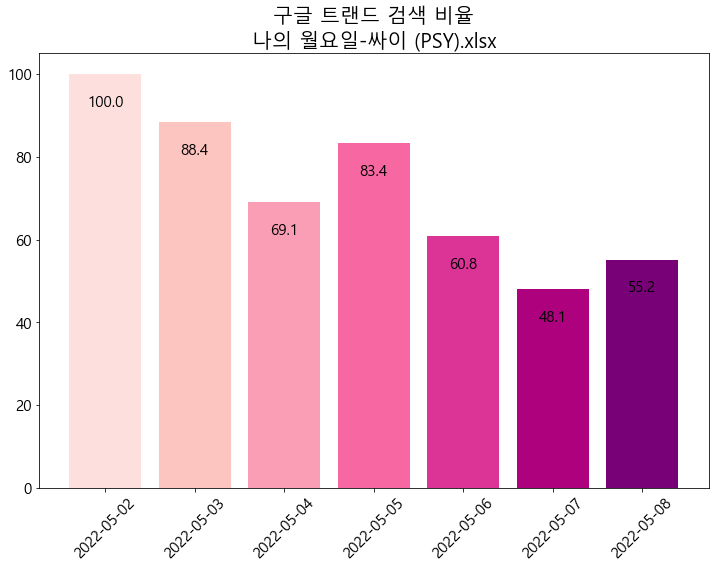

In [62]:
colors = sns.color_palette('RdPu', week_temp.shape[0])
x = week_temp['날짜']
y = week_temp['검색비율']
try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.bar(x, y, color=colors)
        plt.title(f"구글 트랜드 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks(fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                        plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='bottom')
                else:
                        plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                        horizontalalignment='center',
                        verticalalignment='top')
except:
        pass

C:\Users\kbjung\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


D-DAY_휘인(Whee In).xlsx.png 저장 완료.
LOVE_몬스타엑스(Monsta X).xlsx.png 저장 완료.
꽃 길_BIGBANG (빅뱅).xlsx.png 저장 완료.
나의 월요일_싸이 (PSY).xlsx.png 저장 완료.
리무진 (Feat. MINO) (Prod. GRAY)_BE'O (비오).xlsx.png 저장 완료.
문득_BE'O (비오).xlsx.png 저장 완료.
사랑해 진짜_임영웅.xlsx.png 저장 완료.
아버지_임영웅.xlsx.png 저장 완료.


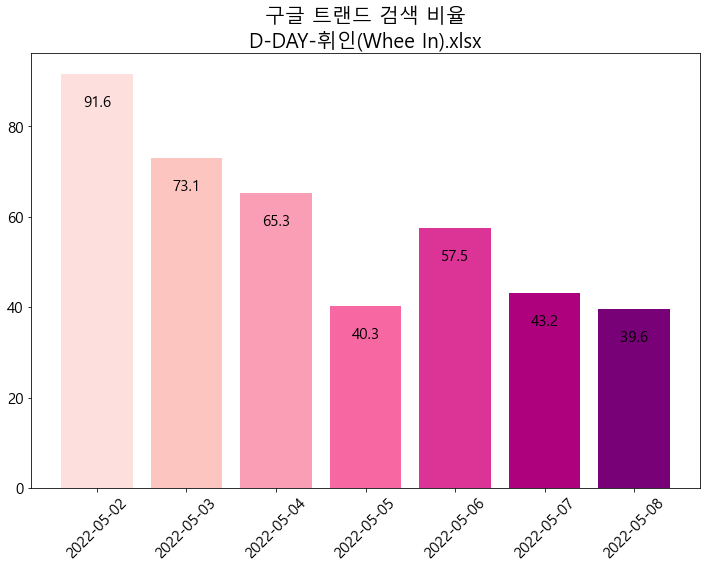

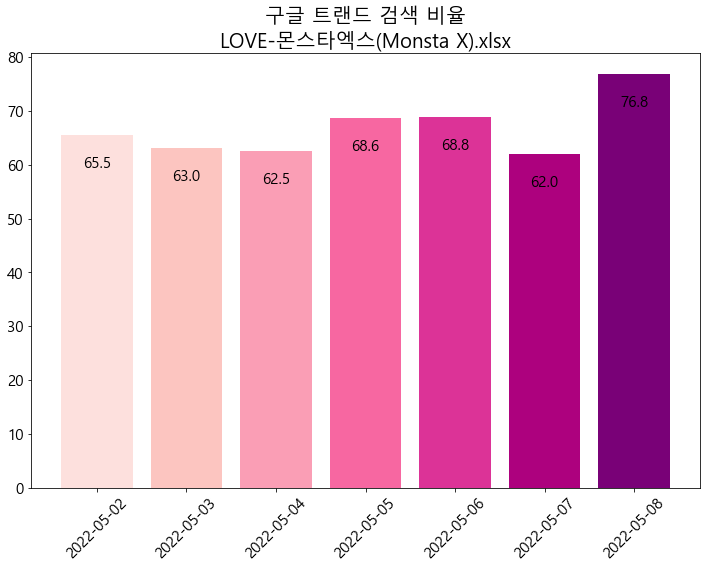

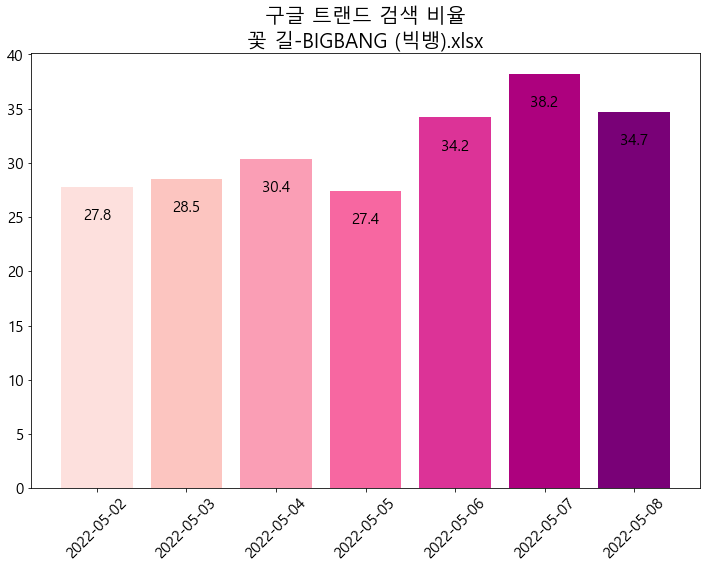

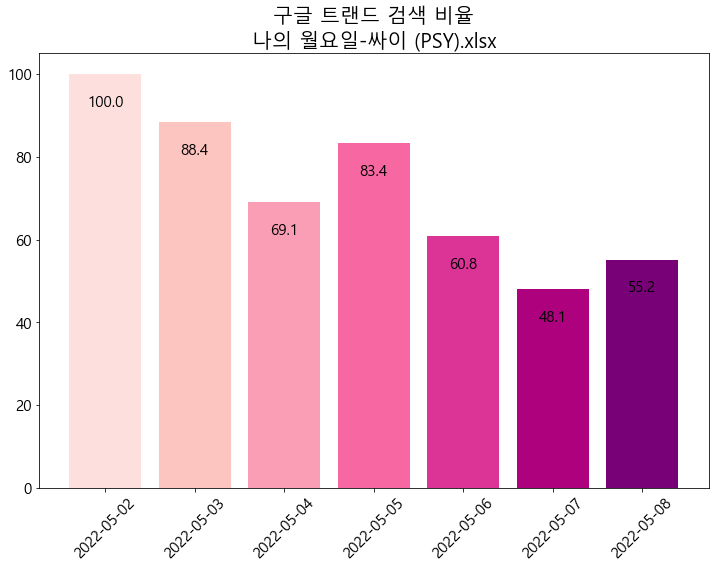

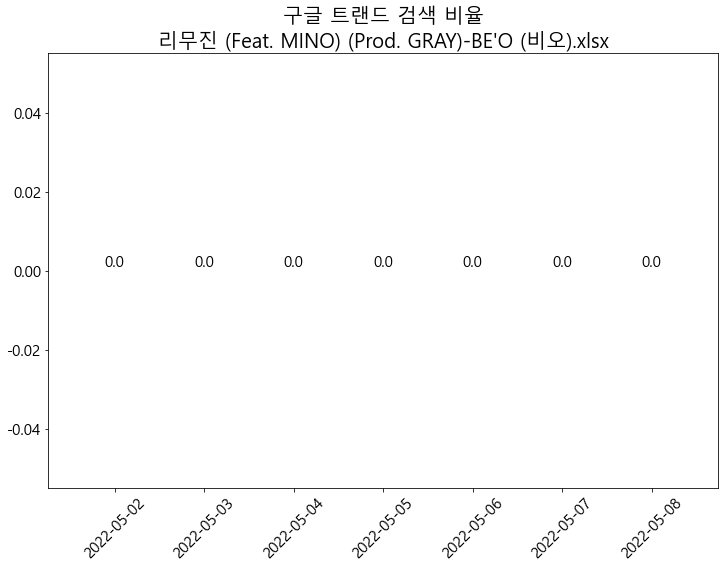

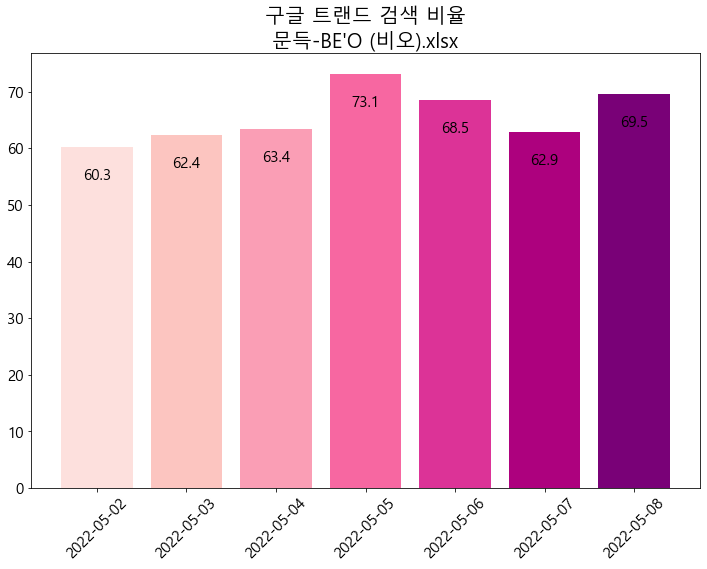

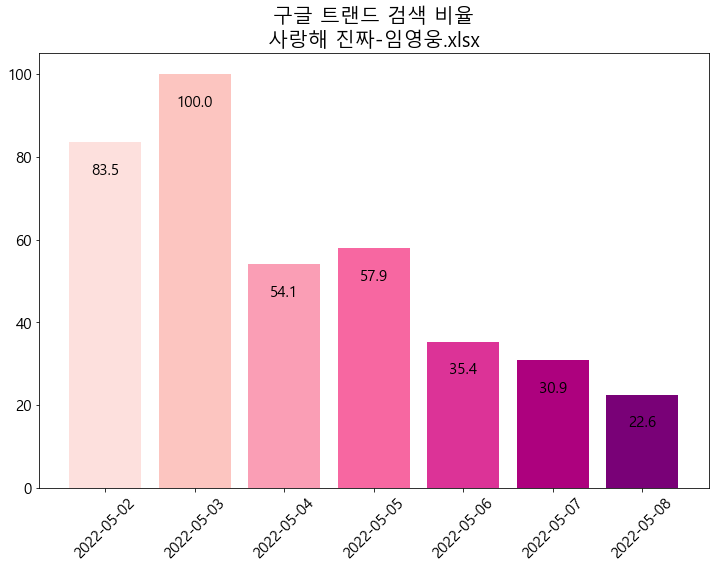

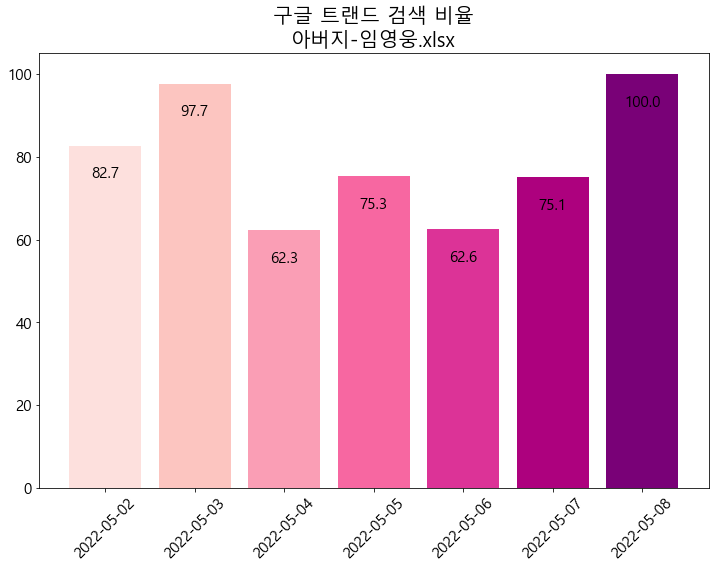

In [63]:
for one in outlier_file_list:
    title = one.split('_')[0]
    artist = one.split('_')[1]
    temp = pd.read_excel(des + one).reset_index(drop=True)
    temp = temp.iloc[6:, :].reset_index(drop=True)
    temp.columns = ['날짜', '검색비율']

    week_temp = temp[ (temp['날짜'] >= start_date) & (temp['날짜'] <= end_date)].reset_index(drop=True)
    week_temp['검색비율'] = week_temp['검색비율'].astype(float)
    week_temp['검색비율'] = round(week_temp['검색비율'], 1)
    
    colors = sns.color_palette('RdPu', week_temp.shape[0])
    x = week_temp['날짜']
    y = week_temp['검색비율']
    try:
        interval_ratio = math.ceil( max(y) )*0.05
        interval_ratio2 = math.ceil( max(y) )*0.2
        plt.figure( figsize=(12,8) )
        plt.bar(x, y, color=colors)
        plt.title(f"구글 트랜드 검색 비율\n{title}-{artist}", fontsize=20)
        plt.xticks(fontsize=15,rotation=45)
        plt.yticks( fontsize=15)
        for i in range( len(y) ):
                if y[i] <= interval_ratio2:
                    plt.text(x[i], y[i]+interval_ratio, round(y[i],1), fontsize=15, color='black',
                            horizontalalignment='center',
                            verticalalignment='bottom')
                else:
                    plt.text(x[i], y[i]-interval_ratio, round(y[i],1), fontsize=15, color='black',
                            horizontalalignment='center',
                            verticalalignment='top')
        plt.savefig(des + f'{title}_{artist}.png')
        print(f'{title}_{artist}.png 저장 완료.')
    except:
        pass

# 코드 마지막